In [31]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
from scipy import stats
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.graphics.gofplots as smqq

In [2]:
def dois_graf(x1,x2,y1,y2,xl1,yl1,xl2,yl2):
    fig = plt.figure(figsize=(15,5))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)
    ax1.scatter(x1,y1)
    ax1.set_xlabel(xl1)
    ax1.set_ylabel(yl1)
    ax2.scatter(x2,y2)
    ax2.set_ylabel(yl2)
    ax2.set_xlabel(xl2)
    

In [23]:
df = pd.read_csv('SENIC.csv')
df = df.drop(columns=['id'])
df

,tempo,idade,risco_infeccao,cultura,x_ray,numero_camas,afiliacao,regiao,census,enfermeiras,servicos
0,7.13,55.7,4.1,9.0,39.6,279,2,4,207,241,60.0
1,8.82,58.2,1.6,3.8,51.7,80,2,2,51,52,40.0
2,8.34,56.9,2.7,8.1,74.0,107,2,3,82,54,20.0
3,8.95,53.7,5.6,18.9,122.8,147,2,4,53,148,40.0
4,11.20,56.5,5.7,34.5,88.9,180,2,1,134,151,40.0
...,...,...,...,...,...,...,...,...,...,...,...
108,11.80,53.8,5.7,9.1,116.9,571,1,2,441,469,62.9
109,9.50,49.3,5.8,42.0,70.9,98,2,3,68,46,22.9
110,7.70,56.9,4.4,12.2,67.9,129,2,4,85,136,62.9
111,17.94,56.2,5.9,26.4,91.8,835,1,1,791,407,62.9


### (a) Para cada um dos modelos, crie scatter plots das covariaveis e visualize as correlacoes entre elas. Descreva esses resultados brevemente

In [5]:
# Modelo 1:
# Idade, probabilidade do risco de infecçao e porcentagem de servicos
# fornecidos.
#
# Modelo 2:
# Numero de leitos, probabilidade do risco de infecçao e porcentagem 
# de serviços fornecidos.

df_1 = df[['tempo', 'idade','risco_infeccao','servicos']]
df_2 = df[['tempo', 'numero_camas','risco_infeccao','servicos']]


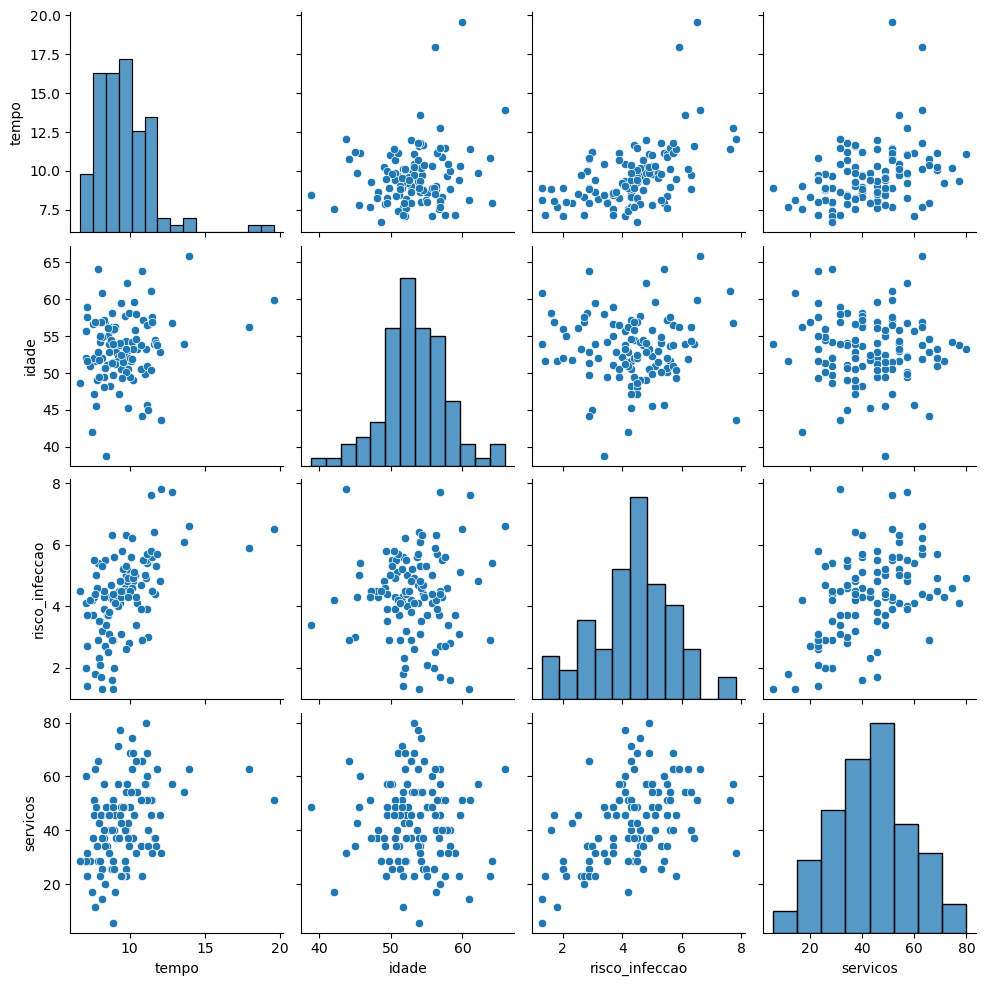

In [6]:
sns.pairplot(df_1)

## Em alguns desses pairplot's temos relaçoes que podem possivelmente se relacionar linearmente, porem sem nenhuma relaçao extraordinariamente obvia.

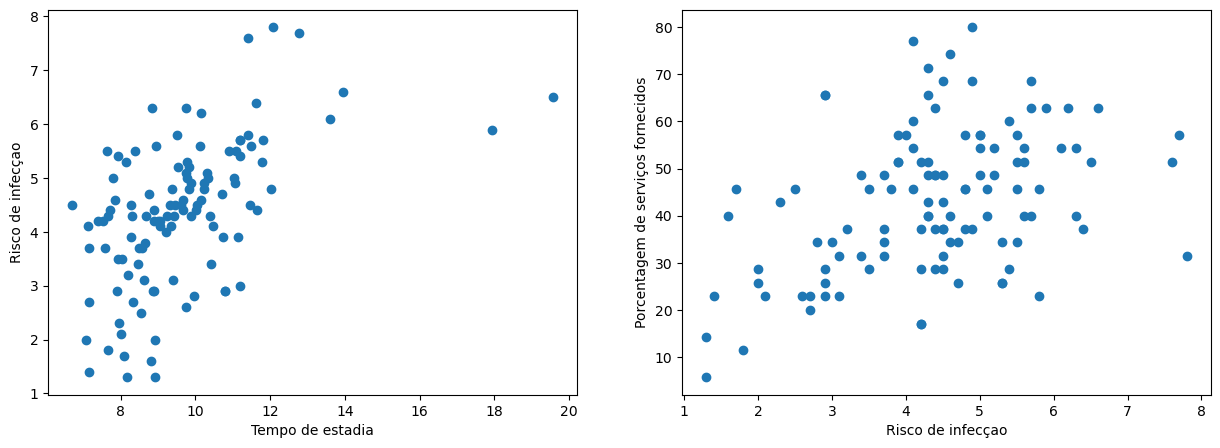

In [31]:
dois_graf(df_1['tempo'],df_1['risco_infeccao'],df_1['risco_infeccao'],df_1['servicos'],"Tempo de estadia","Risco de infecçao","Risco de infecçao","Porcentagem de serviços fornecidos")

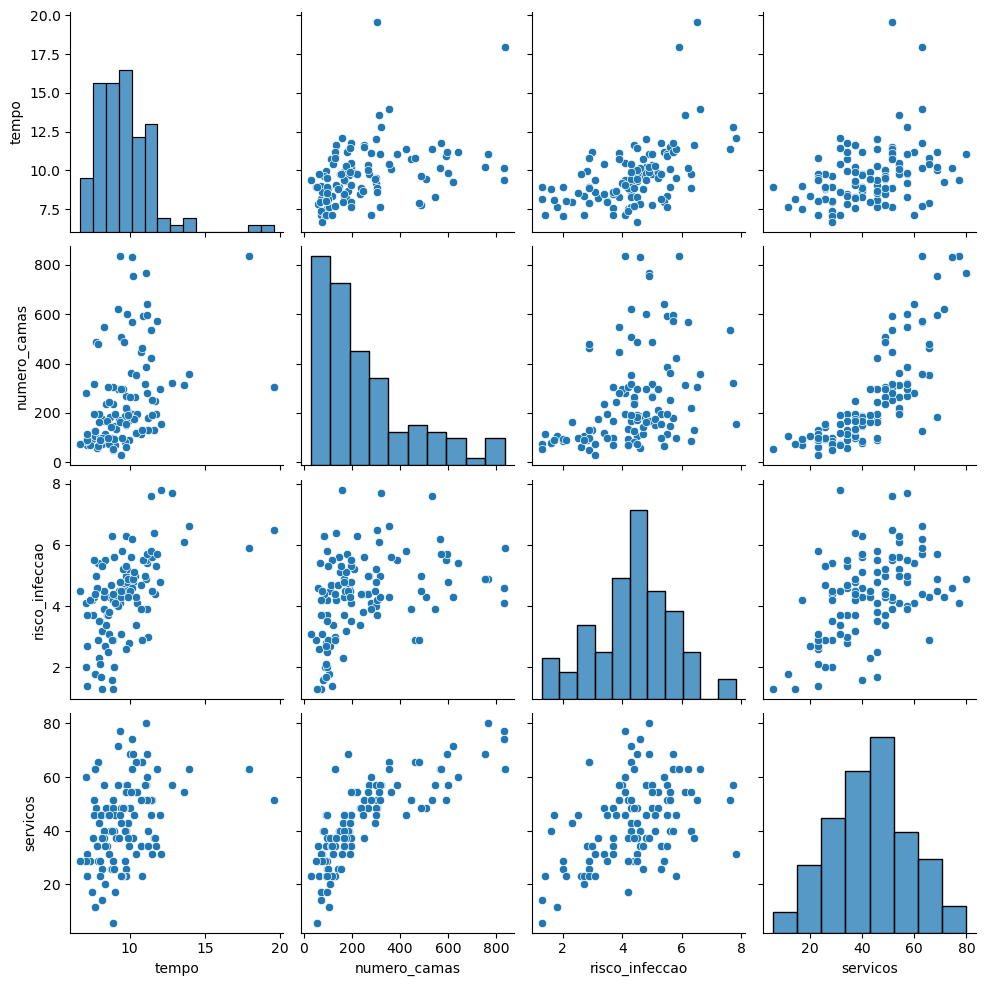

In [26]:
sns.pairplot(df_2)

### Ja para o caso do modelo analisado 2, podemos ver aparentes relaçoes lineares entre os dados, com menos dispersao com relaçao ao modelo 1. Alem dos mesmos que obtivemos no modelo 1 (risco_infeccao x tempo e risco_infeccao x serviços) temos:

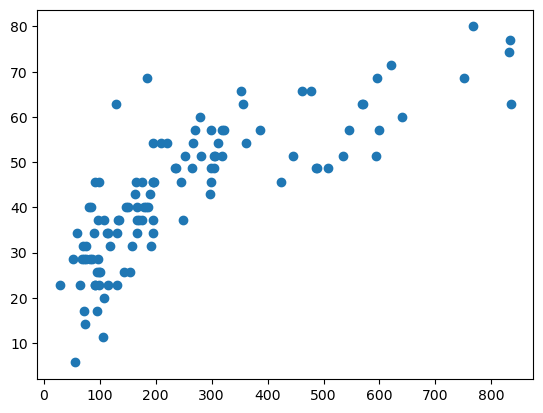

In [37]:
plt.scatter(df_2['numero_camas'],df_2['servicos'])

### (b) Para cada um dos modelos, ajuste um modelo de regressao linear multipla com tres variaveis preditoras. 

In [55]:
X = df_1[['idade','risco_infeccao','servicos']]
y = df_1['tempo']
X2 = df_2[['numero_camas','risco_infeccao','servicos']]
y2 = df_2['tempo']

regr = linear_model.LinearRegression()
regr.fit(X, y)

regr2 = linear_model.LinearRegression()
regr2.fit(X2, y2)

print("Coeficientes do modelo 1: ")
print(regr.coef_)
print("\nCoeficientes do modelo 2: ")
print(regr2.coef_)



Coeficientes do modelo 1: 
[0.08371448 0.6584481  0.02173634]

Coeficientes do modelo 2: 
[ 0.00301784  0.64770692 -0.00928519]


### Risco de infecçao sendo um dos maiores coeficientes. O R^2 segue abaixo. Vemos que quase nao muda, independentemente do modelo. Nenhum modelo faz-se preferivel.

In [59]:
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
results.params

const             1.386462
idade             0.083714
risco_infeccao    0.658448
servicos          0.021736
dtype: float64

In [60]:
X2 = sm.add_constant(X2)
model2 = sm.OLS(y2,X2)
results2 = model2.fit()
results2.params

const             6.467380
numero_camas      0.003018
risco_infeccao    0.647707
servicos         -0.009285
dtype: float64

### Obtendo os residuos agora:

In [61]:
# Residuos do modelo 1
OLS_model = sm.OLS(y,X).fit()
predicted_values = OLS_model.predict() 
residual_values = OLS_model.resid
residual_values

0     -2.923176
1      0.638385
2     -0.022353
3     -1.488693
4      0.461062
         ...   
108    0.789329
109   -0.330347
110   -2.714203
111    6.596725
112    0.503575
Length: 113, dtype: float64

In [62]:
OLS_model2 = sm.OLS(y2,X2).fit()
predicted_values2 = OLS_model2.predict() 
residual_values2 = OLS_model2.resid
residual_values2

0     -2.277844
1      1.446269
2     -0.013394
3     -1.216754
4      0.868887
         ...   
108    0.501543
109   -0.807198
110   -1.422554
111    5.715292
112    1.059842
Length: 113, dtype: float64

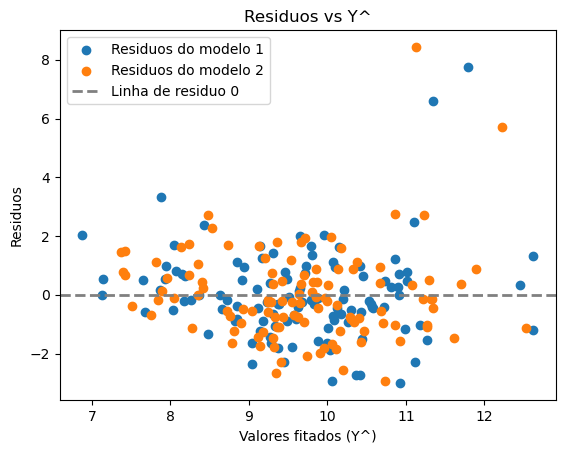

In [70]:
# Visualizando os resíduos em função da resposta ajustada (Y^)
plt.scatter(OLS_model.fittedvalues, residual_values, label='Residuos do modelo 1')
plt.scatter(OLS_model2.fittedvalues, residual_values2, label='Residuos do modelo 2')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=2, label='Linha de residuo 0')
plt.xlabel('Valores fitados (Y^)')
plt.ylabel('Residuos')
plt.legend()
plt.title('Residuos vs Y^')
plt.show()

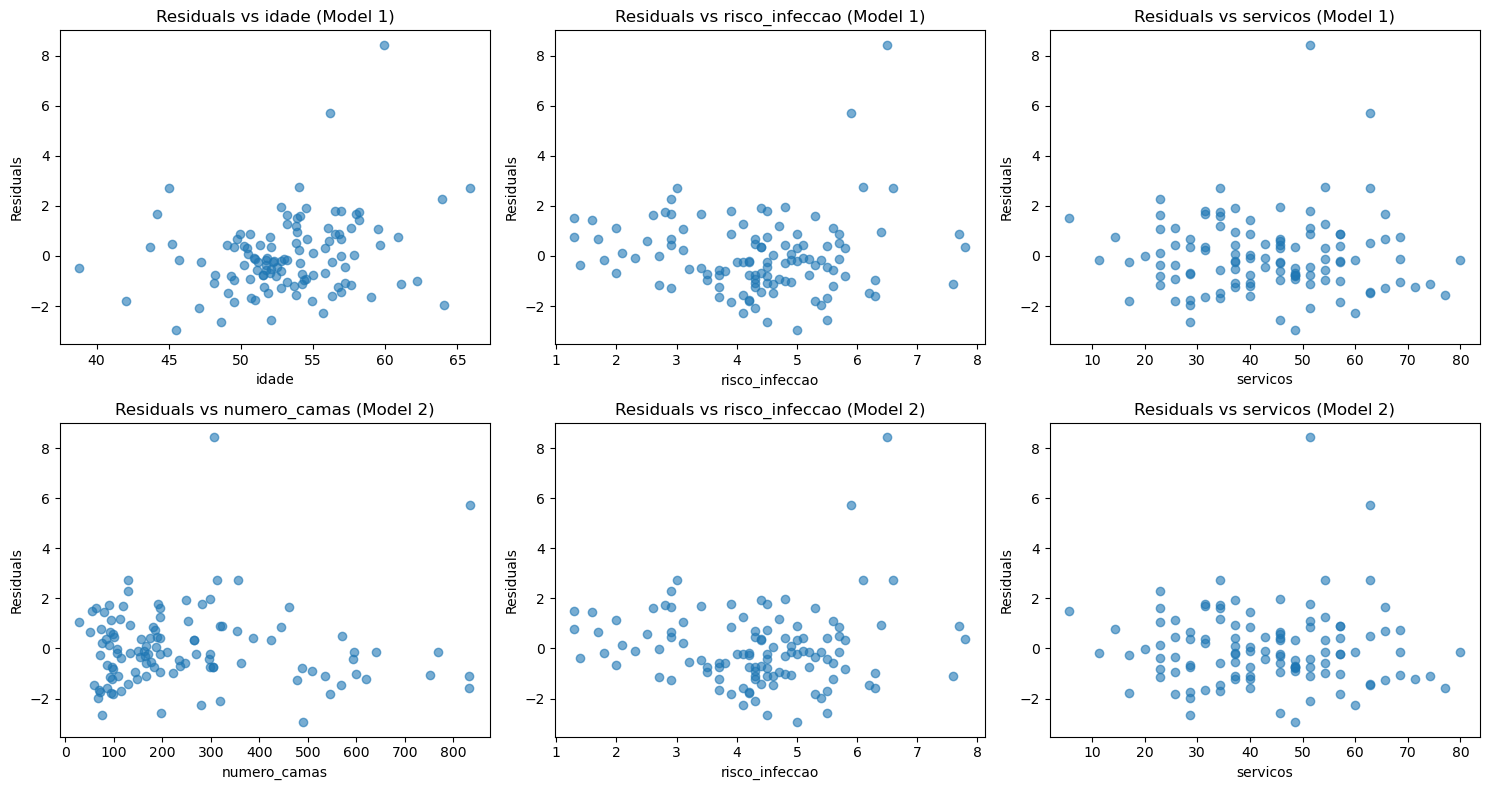

In [68]:
# Visualizando os resíduos em função de cada variável preditora
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
model1_vars = ['idade','risco_infeccao','servicos']
model2_vars = ['numero_camas','risco_infeccao','servicos']
for i, var in enumerate(model1_vars):
    axes[0, i].scatter(df_1[var], residual_values2, alpha=0.6)
    axes[0, i].set_xlabel(var)
    axes[0, i].set_ylabel('Residuals')
    axes[0, i].set_title(f'Residuals vs {var} (Model 1)')

for i, var in enumerate(model2_vars):
    axes[1, i].scatter(df_2[var], residual_values2, alpha=0.6)
    axes[1, i].set_xlabel(var)
    axes[1, i].set_ylabel('Residuals')
    axes[1, i].set_title(f'Residuals vs {var} (Model 2)')

plt.tight_layout()
plt.show()

### (e) Prepare um QQ plot para cada um dos modelos ajustados. Analise os resultados. Algum modelo e mais apropriado em termos da analise dos residuos?

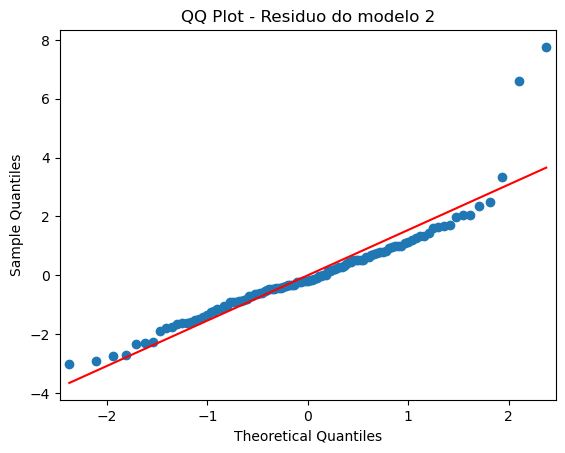

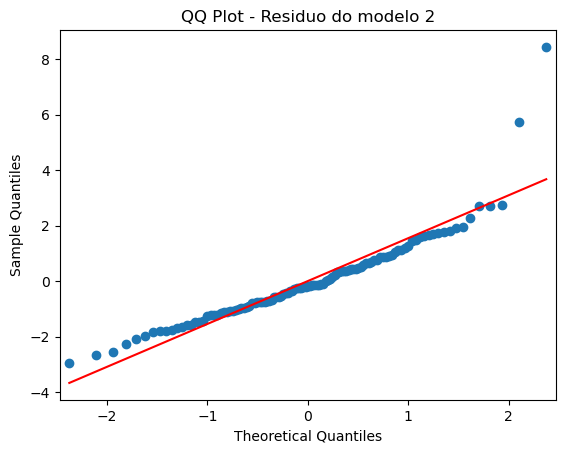

In [73]:
# Modelo 1
sm.qqplot(residual_values, line='s')
plt.title('QQ Plot - Residuo do modelo 2')
plt.show()

# Modelo 2
sm.qqplot(residual_values2, line='s')
plt.title('QQ Plot - Residuo do modelo 2')
plt.show()

### Pela analise do QQPlot vemos que ambos os modelos sao praticamente iguais. Que tal outras analises, como coeficiente de correlaçoes e MSE?

In [77]:
corr_coef = np.corrcoef(stats.zscore(residual_values), stats.zscore(y))[0, 1]
print(f"Coeficiente de Correlação: {corr_coef}")

Coeficiente de Correlação: 0.8094602399277141


In [80]:
mse = mean_squared_error(stats.zscore(residual_values), stats.zscore(y))
print(f"Erro Quadrático Médio (MSE): {mse}")

Erro Quadrático Médio (MSE): 0.3810795201445716


### Vemos, entao, que o ajuste de fato foi adequado, com coeficiente proximo de 1, QQPlot visualmente adequado (quase diagonal) e baixo MSE. 

### 3. Para este exercicio, utilize novamente os dados do projeto SENIC. Considere agora as quatro covariaveis do exercicio acima: idade (X1), numero de leitos (X2), risco de infecçao (X3) e porcentagem de serviços prestados (X4). (a) Crie uma matriz de correlaçoes entre as covariaveis

In [83]:
covariaveis = ['idade', 'numero_camas', 'risco_infeccao', 'servicos']
df3 = df[covariaveis]

# Calculando a matriz de correlações
correlation_matrix = df3.corr()
correlation_matrix

,idade,numero_camas,risco_infeccao,servicos
idade,1.000000,-0.058823,0.001093,-0.040451
numero_camas,-0.058823,1.000000,0.359770,0.794524
risco_infeccao,0.001093,0.359770,1.000000,0.412601
servicos,-0.040451,0.794524,0.412601,1.000000


### (b) Ajuste um modelo de regressao para explicar o tempo medio de permanencia no hospital apenas em termos da porcentagem de serviços prestados. Qual e o valor do coeficiente e seu erro padrao? 

In [9]:
covariaveis = ['tempo','idade', 'numero_camas', 'risco_infeccao', 'servicos']
df3 = df[covariaveis]

y = df3['tempo']
X = sm.add_constant(df3['servicos'])

model = sm.OLS(y, X).fit()

coeficiente = model.params['servicos']
erro_padrao = model.bse['servicos']

print(f"Coeficiente: {coeficiente}")
print(f"Erro Padrao: {erro_padrao}")
print(model.summary())

Coeficiente: 0.044707670802284966
Erro Padrao: 0.011155502613492742
                            OLS Regression Results                            
Dep. Variable:                  tempo   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     16.06
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           0.000111
Time:                        21:25:22   Log-Likelihood:                -225.41
No. Observations:                 113   AIC:                             454.8
Df Residuals:                     111   BIC:                             460.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------

### Temos como coeficiente 0,0447 com erro padrao de 0,0112.

### (c) Ajuste um modelo linear agora com as quatro covariaveis e enuncie a funçao de regressao estimada.

In [10]:
X = df3[['idade', 'numero_camas', 'risco_infeccao', 'servicos']]
y = df3['tempo']

regr = linear_model.LinearRegression()
regr.fit(X, y)

print("Coeficientes do modelo: ")
print(regr.coef_)

Coeficientes do modelo: 
[ 0.08747023  0.00316855  0.64063482 -0.00950834]


### (d) Qual a diferença entre o coeficiente da covariavel de serviços prestados do modelo ajustado em (b) e (c)? Ambos sao significativos com nivel de 95% de confianc¸a? Se encontrar alguma diferença, forneça uma explicaçao baseada na sua observaçao feita em (a).

### Em b) temos um coeficiente de 0,0447, ja em c) -0,0095. Isso parece indicar que de fato a taxa de serviços nao e significativa de fato no modelo.

In [11]:
pip uninstall statsmodels 


^C
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


### (e) Forneça uma interpretaçao para o coeficiente do risco de infecçao. Teste, utilizando um α apropriado, a hipotese de que o coeficiente relacionando risco de infecçao e tempo de permanencia no hospital seja diferente de zero. Forneça suas conclusoes no contexto das variaveis deste problema. 

In [22]:
# Ajuste um modelo linear que inclui a variável de risco de infecção
X = sm.add_constant(df3[['idade', 'numero_camas', 'risco_infeccao', 'servicos']])
y = df3['tempo']
n = [ 0.08747023,  0.00316855,  0.64063482, -0.00950834]

model = sm.OLS(y, X).fit()

# Coeficiente associado à variável de risco de infecção
coef_risk_prob = 0.64063482 


r = np.zeros_like(n)

# Teste de hipótese para verificar se o coeficiente é diferente de zero
alpha = 0.05
test_statistic, p_value, _, _ = model.t_test(r)

# Exibindo os resultados
print(f"Coeficiente de Risco de Infecção: {coef_risk_prob}")
print(f"Teste t - Estatística: {test_statistic[0][0]}")
print(f"Valor p: {p_value[0][0]}")

ValueError: wrong shape for coefs

### (f) Qual e o valor da media dos quadrados dos residuos? Explique se o modelo se ajusta aos dados de maneira satisfatoria.

In [20]:
X = df3[['idade', 'numero_camas', 'risco_infeccao', 'servicos']]
y = df3['tempo']

OLS_model2 = sm.OLS(y,X).fit()
predicted_values2 = OLS_model2.predict() 
residual_values2 = OLS_model2.resid

soma = sum(residual_values2**2)/len(residual_values2)
soma



2.257459111784484

### O modelo se ajusta de forma satisfatoria.

### 4. Para este exercicio, utilize novamente os dados do projeto SENIC.
### (a) Para cada regiao geografica, ajuste um modelo de regressao (Y) com as covariaveis idade (X1), taxa de culturas coletadas de sinais ou sintomas de terem adquirido infecçao (X2), numero medio de pacientes no hospital (census, X3) e numero de serviços disponibilizados (X4). Enuncie as funçoes de regressao encontradas. 

In [35]:
regioes = df['regiao'].unique()

for regiao in regioes:
    dados_regiao = df[df['regiao'] == regiao]

    y = dados_regiao['tempo']

    X = sm.add_constant(dados_regiao[['idade', 'cultura', 'census', 'servicos']])
    
    model = sm.OLS(y, X).fit()

    print(f"Região: {regiao}")
    print("Função de Regressão Estimada:")
    print(f"Y ={ np.round(model.params['const'],3)} + { np.round(model.params['idade'],3)} * X1 + { np.round(model.params['cultura'],3)} * X2 + { np.round(model.params['census'],3)} * X3 + { np.round(model.params['servicos'],3)} * X4")
    #print("\nResumo Estatístico:")
    #print(model.summary())
    print("\n" + "="*50 + "\n")

Região: 4
Função de Regressão Estimada:
Y =5.164 + 0.052 * X1 + 0.03 * X2 + 0.006 * X3 + -0.025 * X4


Região: 2
Função de Regressão Estimada:
Y =7.218 + 0.019 * X1 + 0.038 * X2 + 0.003 * X3 + 0.004 * X4


Região: 3
Função de Regressão Estimada:
Y =3.641 + 0.083 * X1 + 0.059 * X2 + 0.003 * X3 + -0.005 * X4


Região: 1
Função de Regressão Estimada:
Y =-5.382 + 0.285 * X1 + -0.002 * X2 + 0.01 * X3 + -0.023 * X4




### (b) Os modelos ajustados das quatro regioes sao similares? Discuta.

### No geral a ordem de grandeza de cada respectivo coeficiente é bem comparavel a um mesmo coeficiente em outra regiao. Nao vemos tanta flutuaçao nos valores tambem, mesmo eles nao sendo necessariamente proximos.

### (c) Calcule o MSE e o R2 para cada regiao. Discuta como a variancia dos dados de cada regiao e explicada por cada modelo .

In [38]:
regioes = df['regiao'].unique()
mse_por_regiao = {}
r2_por_regiao = {}

for regiao in regioes:
    dados_regiao = df[df['regiao'] == regiao]

    y = dados_regiao['tempo']
    X = sm.add_constant(dados_regiao[['idade', 'cultura', 'census', 'servicos']])

    model = sm.OLS(y, X).fit()
    y_pred = model.predict(X)

    mse = mean_squared_error(y, y_pred)
    mse_por_regiao[regiao] = mse
    r2 = r2_score(y, y_pred)
    r2_por_regiao[regiao] = r2

    print(f"Região: {regiao}")
    print(f"MSE: {np.round(mse,4)}")
    print(f"R^2: {np.round(r2,4)}")
    print("\n" + "="*50 + "\n")

Região: 4
MSE: 0.6533
R^2: 0.3075


Região: 2
MSE: 0.814
R^2: 0.4096


Região: 3
MSE: 1.0666
R^2: 0.2695


Região: 1
MSE: 3.1846
R^2: 0.5366




### Podemos ver entao que o modelo com menor MSE é o da regiao 4. Também tem um dos menores valores de R2. A principal variabilidade do modelo é justificada principalmente pela taxa de culturas coletadas de sinais ou sintomas depois de terem adquirido infecçao, porém nao é por muita diferença. 
### O modelo com maior MSE é o que também possui o maior valor de R2, o da regiao 1. Quer dizer que os dados melhor se ajustam a esse fitting, que tenta justificar a variabilidade principalmente pela taxa de culturas coletadas de sinais ou sintomas depois de terem adquirido infecçao, e basicamente leva esse fator com mais peso. 
### A regiao 3 utiliza tanto da taxa de cultura quando do Census para explicar a variabilidade.
### A regiao 2 assemelha-se a 3 porem leva mais em conta a covariavel Census.

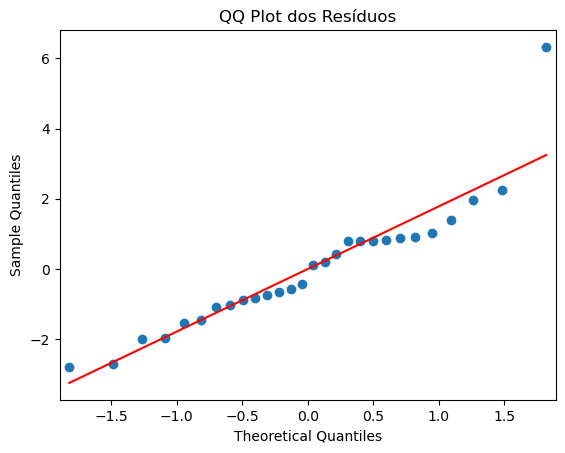

In [39]:
import scipy.stats as stats
dados_regiao = df[df['regiao'] == regiao]

y = dados_regiao['tempo']
X = sm.add_constant(dados_regiao[['idade', 'cultura', 'census', 'servicos']])

# Ajustar o modelo
model = sm.OLS(y, X).fit()

# Obter os resíduos
residuos = model.resid

# Criar QQ plot
sm.qqplot(residuos, line='s')
plt.title('QQ Plot dos Resíduos')
plt.show()

### Os resultados apontam que o modelo nao é extremamente preciso, porem possui algum merito.